In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
 8   Age            301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [7]:
df['Age']=2022-df['Year']
df.drop(columns=['Year'],inplace=True)

In [8]:
df.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [10]:
df['Owner'].unique()

array([0, 1, 3], dtype=int64)

In [11]:
df['Owner'].value_counts()

0    290
1     10
3      1
Name: Owner, dtype: int64

## Exploratory Data Analysis (EDA)

### For Categorical Variables

C:\Users\Deepanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


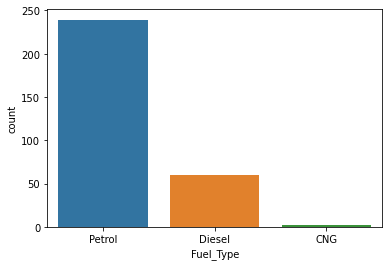

In [12]:
sns.countplot(df['Fuel_Type']);


C:\Users\Deepanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


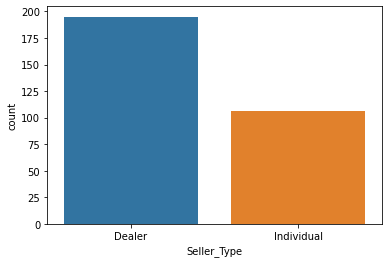

In [13]:
sns.countplot(df['Seller_Type']);

C:\Users\Deepanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


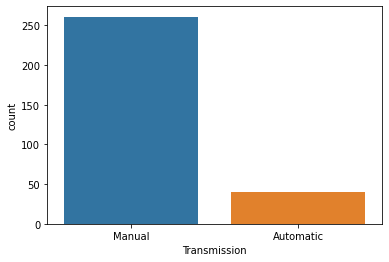

In [14]:
sns.countplot(df['Transmission']);

### for numerical

C:\Users\Deepanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


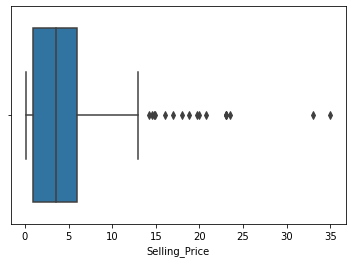

In [15]:
sns.boxplot(df['Selling_Price'],data=df);

C:\Users\Deepanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


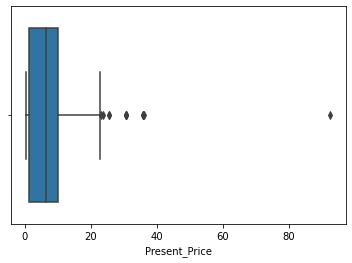

In [16]:
sns.boxplot(df['Present_Price'],data=df);

C:\Users\Deepanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


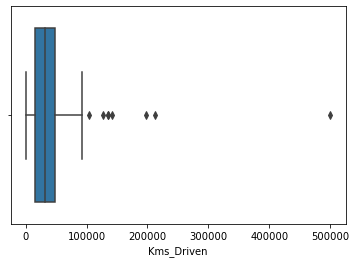

In [17]:
sns.boxplot(df['Kms_Driven'],data=df);

In [18]:
df.groupby(['Kms_Driven','Present_Price'])['Selling_Price']

In [19]:
df.corr()['Selling_Price']

Selling_Price    1.000000
Present_Price    0.878983
Kms_Driven       0.029187
Owner           -0.088344
Age             -0.236141
Name: Selling_Price, dtype: float64

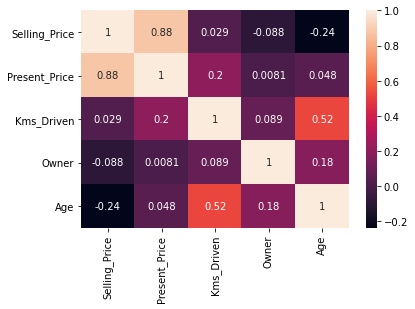

In [20]:
sns.heatmap(df.corr(),annot=True);

In [21]:
df.drop(columns=['Car_Name'],inplace=True)

### One Hot Encoding

In [22]:
df=pd.get_dummies(df,columns=['Fuel_Type','Seller_Type','Transmission'])

In [23]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,8,0,0,1,1,0,0,1
1,4.75,9.54,43000,0,9,0,1,0,1,0,0,1
2,7.25,9.85,6900,0,5,0,0,1,1,0,0,1
3,2.85,4.15,5200,0,11,0,0,1,1,0,0,1
4,4.60,6.87,42450,0,8,0,1,0,1,0,0,1


### Feature Selection

In [24]:
Y=df['Selling_Price']
X=df.drop(columns=['Selling_Price'])

In [25]:
X.shape

(301, 11)

In [26]:
Y.shape

(301,)

In [27]:
df.skew(axis=0)

Selling_Price              2.493422
Present_Price              4.083150
Kms_Driven                 6.436013
Owner                      7.616850
Age                        1.246189
Fuel_Type_CNG             12.206146
Fuel_Type_Diesel           1.512750
Fuel_Type_Petrol          -1.461340
Seller_Type_Dealer        -0.622146
Seller_Type_Individual     0.622146
Transmission_Automatic     2.173776
Transmission_Manual       -2.173776
dtype: float64

In [28]:
import scipy.stats as st
import pylab

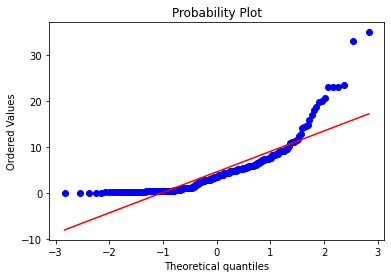

In [29]:
st.probplot(df['Selling_Price'],dist='norm',plot=pylab);

In [30]:
sp=st.boxcox(df['Selling_Price'])
sp=sp[0]
sp

array([ 1.35827922,  1.81194176,  2.40296342,  1.15820204,  1.76899159,
        2.76554917,  2.29973946,  2.24578292,  2.68136758,  2.44264064,
        1.15820204,  2.32086898,  2.4524248 ,  2.1558438 ,  0.87639577,
        2.50056675,  2.40296342,  2.50056675,  1.32030054,  1.07011795,
        1.15820204,  1.85380574,  1.70992182,  1.00044485,  1.17943691,
        1.22103106,  1.6329417 ,  2.13261379,  0.71182082,  2.44264064,
        1.26151565,  0.92729487,  1.86752946,  2.13261379,  2.01151917,
        1.20037692,  1.78343289, -0.95220279,  1.22103106,  0.87639577,
        2.09717302,  1.02403713,  0.71182082,  2.01151917,  0.22791734,
        2.4524248 ,  1.07011795,  0.04901588,  2.08519564,  2.50056675,
        3.52527245,  4.27926686,  3.84595064,  3.64477466,  1.11480952,
        1.44935332,  1.73972285,  1.81194176,  1.61709638,  4.02886311,
        2.34174982,  1.73972285,  3.91672746,  4.31825146,  4.95515453,
        1.81194176,  4.00760853,  2.76554917,  1.69481484,  3.45

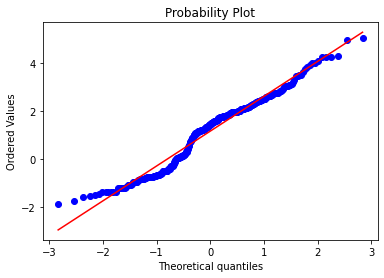

In [31]:
st.probplot(sp,dist='norm',plot=pylab);

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.23621461, -0.25622446, -0.17450057, ..., -0.73728539,
        -0.39148015,  0.39148015],
       [ 0.22150462,  0.1559105 , -0.17450057, ..., -0.73728539,
        -0.39148015,  0.39148015],
       [ 0.25742689, -0.77396901, -0.17450057, ..., -0.73728539,
        -0.39148015,  0.39148015],
       ...,
       [ 0.39068691,  1.31334003, -0.17450057, ..., -0.73728539,
        -0.39148015,  0.39148015],
       [ 0.56450434, -0.7198763 , -0.17450057, ..., -0.73728539,
        -0.39148015,  0.39148015],
       [-0.20029235, -0.81095812, -0.17450057, ..., -0.73728539,
        -0.39148015,  0.39148015]])

In [34]:
round(np.mean(X_scaled),2)

-0.0

In [35]:
np.var(X_scaled)

1.0

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

In [39]:
print(X_train.shape,Y_train.shape)

(240, 11) (240,)


In [40]:
print(X_test.shape,Y_test.shape)

(61, 11) (61,)


In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [43]:
regression.score(X_train,Y_train)

0.8822783397439672

In [44]:
regression.score(X_test,Y_test)

0.8625260513315233

In [45]:
def adj_r2(X,Y):
    r2=regression.score(X,Y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [46]:
adj_r2(X_train,Y_train)

0.8765987859596849

In [47]:
adj_r2(X_test,Y_test)

0.8316645526508448

In [48]:
y_pred=regression.predict(X_test)

In [49]:
# mean square error
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,y_pred)
mse

2.982384861859792

In [50]:
# Root mean square error
rmse=0.5*mse
rmse

1.491192430929896

In [51]:
from sklearn.metrics import mean_absolute_percentage_error

In [52]:
#mean absolute percentage error
mean_absolute_percentage_error(Y_test, y_pred)

1.2702924543512402

### Checking Regularization

In [53]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression

In [54]:
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, Y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [55]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0033749591682577644

In [56]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, Y_train)

Lasso(alpha=0.0033749591682577644)

In [57]:
lasso_reg.score(X_test, Y_test)

0.8637452257774441

In [58]:
X.columns

Index(['Present_Price', 'Kms_Driven', 'Owner', 'Age', 'Fuel_Type_CNG',
       'Fuel_Type_Diesel', 'Fuel_Type_Petrol', 'Seller_Type_Dealer',
       'Seller_Type_Individual', 'Transmission_Automatic',
       'Transmission_Manual'],
      dtype='object')

In [59]:
import statsmodels.formula.api as smf

In [60]:
lm = smf.ols(formula='Selling_Price ~ Present_Price + Kms_Driven + Owner + Age + Fuel_Type_CNG + Fuel_Type_Diesel + Fuel_Type_Petrol + Seller_Type_Dealer + Seller_Type_Individual + Transmission_Automatic + Transmission_Manual', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          5.71e-131
Time:                        23:05:50   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.2810      0.239      9.535      0.000       1.810       2.752
Present_Price              0.4372      0.016     27.355      0.000       0.406       0.469
Kms_Driven             -7.013e-06   3.23e-06     -2.172      0.031   -1.34e-05   -6.57e-07
Owner                     -0.6742      0.423     -1.595      0.112      -1.506       0.158
Age                       -0.3931      0.043     -9.159      0.000      -0.478      -0.309
Fuel_Type_CNG             -0.2655      0.900     -0.295      0.768      -2.037       1.506
Fuel_Type_Diesel           2.2044      0.409      5.389      0.000       1.399       3.010
Fuel_Type_Petrol           0.3421      0.379      0.902      0.368      -0.404       1.089
Seller_Type_Dealer         1.7012      0.172      9.913      0.000       1.363       2.039
Seller_Type_Individual     0.5799      0.179      3.238      0.001       0.227       0.932
Transmission_Automatic     1.8646      0.227      8.201      0.000       1.417       2.312
Transmission_Manual        0.4164      0.175      2.378      0.018       0.072       0.761
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                     6.82e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.86e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [61]:
X.drop(columns=['Owner','Fuel_Type_CNG','Fuel_Type_Petrol'],inplace=True)

In [62]:
X

,Present_Price,Kms_Driven,Age,Fuel_Type_Diesel,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,5.59,27000,8,0,1,0,0,1
1,9.54,43000,9,1,1,0,0,1
2,9.85,6900,5,0,1,0,0,1
3,4.15,5200,11,0,1,0,0,1
4,6.87,42450,8,1,1,0,0,1
...,...,...,...,...,...,...,...,...
296,11.60,33988,6,1,1,0,0,1
297,5.90,60000,7,0,1,0,0,1
298,11.00,87934,13,0,1,0,0,1
299,12.50,9000,5,1,1,0,0,1


In [63]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[-0.23621461, -0.25622446, -0.128897  , ..., -0.73728539,
        -0.39148015,  0.39148015],
       [ 0.22150462,  0.1559105 ,  0.21751369, ..., -0.73728539,
        -0.39148015,  0.39148015],
       [ 0.25742689, -0.77396901, -1.16812909, ..., -0.73728539,
        -0.39148015,  0.39148015],
       ...,
       [ 0.39068691,  1.31334003,  1.60315648, ..., -0.73728539,
        -0.39148015,  0.39148015],
       [ 0.56450434, -0.7198763 , -1.16812909, ..., -0.73728539,
        -0.39148015,  0.39148015],
       [-0.20029235, -0.81095812, -0.8217184 , ..., -0.73728539,
        -0.39148015,  0.39148015]])

In [64]:
round(np.mean(X_scaled),2)

-0.0

In [65]:
np.var(X_scaled)

1.0

In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=1)

In [69]:
print(X_train.shape,Y_train.shape)

(240, 8) (240,)


In [70]:
print(X_test.shape,Y_test.shape)

(61, 8) (61,)


In [71]:
regression = LinearRegression()

regression.fit(X_train,Y_train)

LinearRegression()

In [72]:
regression.score(X_train,Y_train)

0.8821373810652041

In [73]:
regression.score(X_test,Y_test)

0.8712818980940388

In [74]:
def adj_r2(X,Y):
    r2=regression.score(X,Y)
    n=X.shape[0]
    p=X.shape[1]
    adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [75]:
adj_r2(X_train,Y_train)

0.878055558764432

In [76]:
adj_r2(X_test,Y_test)

0.8514791131854293

In [77]:
y_pred=regression.predict(X_test)
print(y_pred)
len(y_pred)

[ 7.86049779e+00  2.97360240e+00 -5.70428184e-01  4.21549271e+00
  4.98655012e-01  5.82052178e+00  1.96721765e+00  2.56491400e+00
  7.70767934e+00  9.90279658e-01  8.14435436e+00  3.51512851e+00
  4.90941178e+00  4.29516845e+00 -2.48303968e+00  3.14554532e+00
  7.99001149e+00  6.77098531e+00  6.90433663e+00  8.02249285e+00
  4.31908874e+00  4.01108672e+00  1.13002912e+01  8.07834916e+00
  8.50962084e+00  3.98123690e+00  3.80973984e+00  1.07298936e+00
 -5.89176799e-01 -6.02480063e-01  1.54708347e-02 -1.26632130e+00
  4.28728662e+00  2.06763014e+01  1.87557647e+01  4.27490304e+00
  3.49176828e+00  1.67910254e+00 -3.73486037e-01  5.78666080e+00
  8.03508883e+00  9.89016020e+00  7.85376922e-02  6.09099810e+00
  5.88837802e+00  4.33017253e+00  7.38486775e+00  5.86172263e+00
  8.21962030e+00  1.66582878e+00  3.83406466e+00  1.76046489e+00
  2.52172473e+00  4.20252252e+00  1.50215346e+00 -3.41748009e+00
  2.04759996e+01  6.77305174e-01  5.40092301e+00  5.65820269e+00
  6.64593750e-01]


61

In [78]:
list(X)

['Present_Price',
 'Kms_Driven',
 'Age',
 'Fuel_Type_Diesel',
 'Seller_Type_Dealer',
 'Seller_Type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [79]:
lm = smf.ols(formula='Selling_Price ~ Present_Price + Kms_Driven  + Age  + Fuel_Type_Diesel  + Seller_Type_Dealer + Seller_Type_Individual + Transmission_Automatic + Transmission_Manual', data=df).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     364.4
Date:                Mon, 04 Apr 2022   Prob (F-statistic):          6.18e-133
Time:                        23:06:06   Log-Likelihood:                -595.04
No. Observations:                 301   AIC:                             1204.
Df Residuals:                     294   BIC:                             1230.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.4755      0.181     13.666      0.000       2.119       2.832
Present_Price              0.4358      0.016     27.287      0.000       0.404       0.467
Kms_Driven             -7.026e-06   3.23e-06     -2.173      0.031   -1.34e-05   -6.63e-07
Age                       -0.4032      0.043     -9.482      0.000      -0.487      -0.319
Fuel_Type_Diesel           1.8827      0.299      6.302      0.000       1.295       2.471
Seller_Type_Dealer         1.8195      0.159     11.416      0.000       1.506       2.133
Seller_Type_Individual     0.6560      0.152      4.303      0.000       0.356       0.956
Transmission_Automatic     1.9550      0.214      9.119      0.000       1.533       2.377
Transmission_Manual        0.5206      0.156      3.343      0.001       0.214       0.827
==============================================================================
Omnibus:                       93.228   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              692.402
Skew:                           1.043   Prob(JB):                    4.43e-151
Kurtosis:                      10.131   Cond. No.                     3.59e+20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""